In [78]:
import numpy as np
from scipy import misc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import pandas 

def read_scene():
    data_x = misc.imread('Desktop\\HW05\\EC\\Data\\umass_campus_100x100x3.jpg')
 
    return (data_x)
data_x = read_scene()
print('X = ', data_x.shape)
flattened_image = data_x.ravel().reshape(data_x.shape[0] * data_x.shape[1], data_x.shape[2])
flattened_image = flattened_image / 255   ##  I divide by 255 so that plt.show() shows the right colors




Errors_DataFrame=pandas.DataFrame(np.transpose(cluster_number), columns=['k'])

X =  (100, 100, 3)


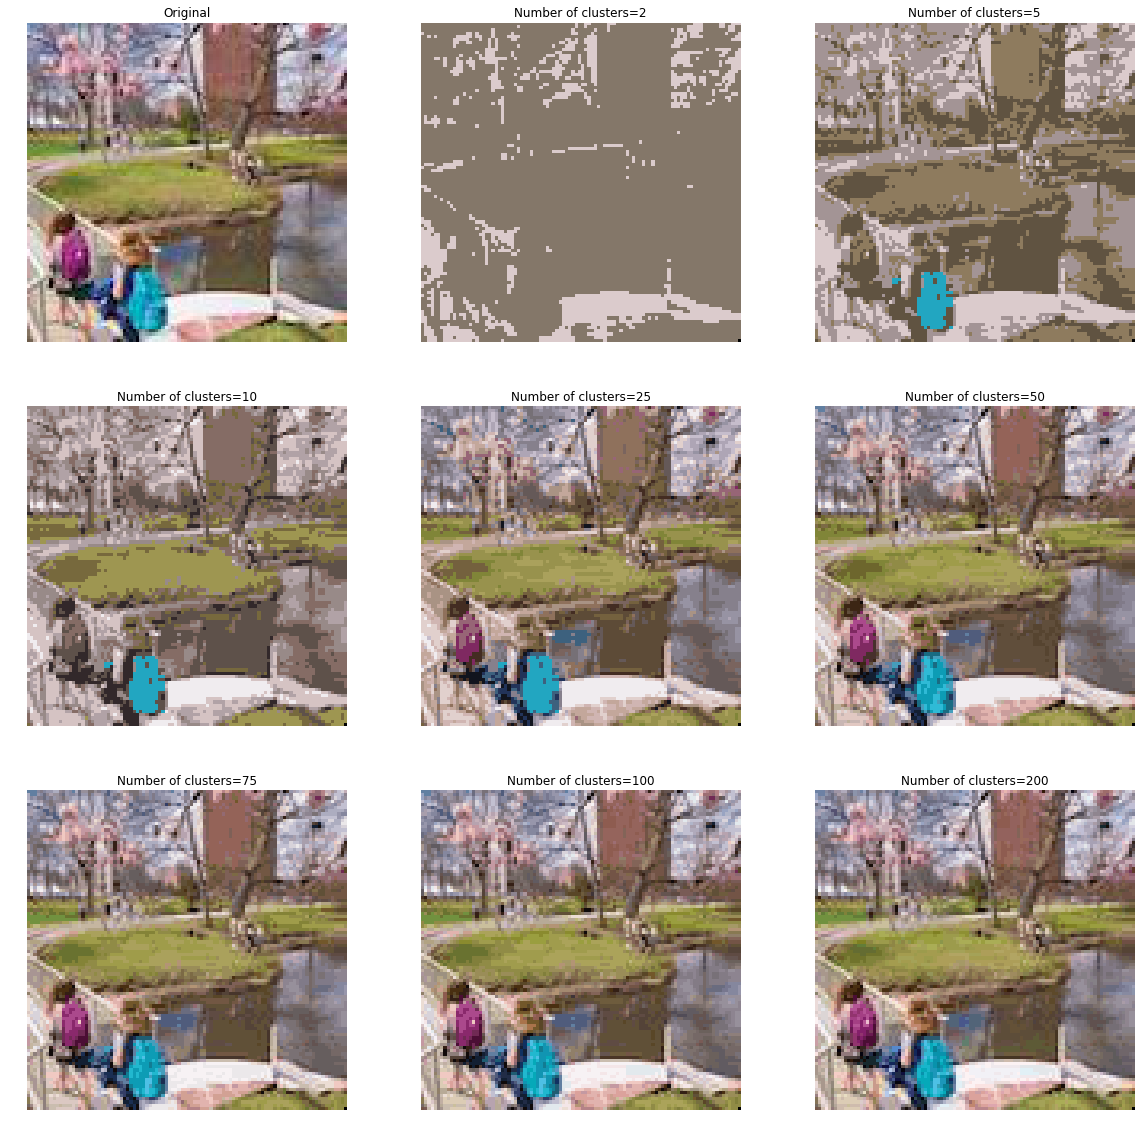

In [92]:

affinity='euclidean' 
linkage='ward'

# Plotting the original image
fig = plt.figure(figsize=(20,20))
cluster_number=[2,5,10,25,50,75,100,200]
plt.subplot(3,3,1)
name= 'Original'
plt.imshow(data_x)
plt.title(name,horizontalalignment='center', y=1)
plt.axis('off')
Error=np.zeros((8,1))
for i in range(1,len(cluster_number) + 1):

    HACclustering = AgglomerativeClustering(n_clusters=cluster_number[i-1], affinity=affinity, linkage=linkage).fit(flattened_image)
    clusters= HACclustering.fit_predict(flattened_image)
    clusters = np.asmatrix(clusters)
    clusters = np.transpose(clusters)
    clustered_flattened_image = np.append(flattened_image,clusters,axis=1)
    ### Turning our dta into a pandas dataframe to make grouping easier
    ColNames=['R','G','B','cluster']
    DF = pandas.DataFrame(clustered_flattened_image, columns=ColNames)
    Red = DF.groupby('cluster')['R'].mean()
    Green = DF.groupby('cluster')['G'].mean()
    Blue = DF.groupby('cluster')['B'].mean()
    RGB = pandas.concat([Red,Green,Blue],axis=1)
    RGB = RGB.as_matrix()
    flattened_image_Reconstructed = np.zeros((len(flattened_image),3))
    
    Error_Name='HAC_Reconstruction_Error' +'_' +affinity +'_'+ linkage
    
    
    for j in range(0,len(flattened_image)-1):
        flattened_image_Reconstructed[j,:] = RGB[clusters[j]]
        
    Error[i-1]= np.sqrt((np.power((flattened_image_Reconstructed -  flattened_image),2)).mean()  )     
    
    
    
    Reconstructed_Image = flattened_image_Reconstructed.ravel().reshape(data_x.shape[0], data_x.shape[1], data_x.shape[2])
    plt.subplot(3,3,i+1)
    name= 'Number of clusters=' + str(cluster_number[i-1])
    plt.imshow(Reconstructed_Image)
    plt.title(name,horizontalalignment='center', y=1)
    plt.axis('off')
    
    
    
    
plt.savefig("HACClustering.jpg")    
df = pandas.DataFrame(Error, columns=[Error_Name])
Errors_DataFrame=pandas.concat([Errors_DataFrame,df],axis=1)

plt.show()

Errors_DataFrame.to_csv('Desktop\HACErrors.csv')

In [75]:
Errors_DataFrame

,k,HAC_Reconstruction_Error_euclidean_complete,HAC_Reconstruction_Error_l1_complete,HAC_Reconstruction_Error_l2_complete,HAC_Reconstruction_Error_cosine_complete,HAC_Reconstruction_Error_manhattan_complete,HAC_Reconstruction_Error_euclidean_ward,HAC_Reconstruction_Error_euclidean_average
0,2,0.164404,0.158721,0.164404,0.173948,0.158721,0.145460,0.188372
1,5,0.103869,0.088160,0.103869,0.166617,0.088160,0.088985,0.095586
2,10,0.072087,0.076684,0.072087,0.155019,0.076684,0.065144,0.091338
3,25,0.052288,0.053866,0.052288,0.146838,0.053866,0.045108,0.058755
4,50,0.040673,0.040039,0.040673,0.142974,0.040039,0.034574,0.047730
5,75,0.035006,0.034618,0.035006,0.139234,0.034618,0.030169,0.041521
6,100,0.031050,0.030876,0.031050,0.138095,0.030876,0.027428,0.035070
7,200,0.023954,0.024129,0.023954,0.133593,0.024129,0.021374,0.026788


In [77]:
Errors_DataFrame.to_csv('Desktop\HACErrors.csv')

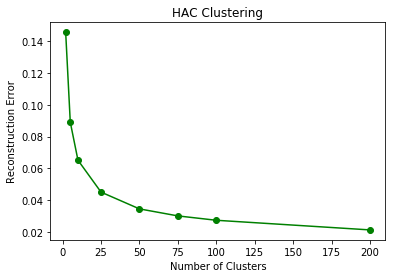

In [91]:
fig = plt.figure()
plt.xlabel("Number of Clusters")
plt.ylabel("Reconstruction Error")
plt.title("HAC Clustering")
plt.plot(cluster_number,Error,'-o',color='green')
plt.savefig("HACError.jpg") 
plt.show()